In [1]:
import requests
import json 
from bs4 import BeautifulSoup as bs
from tqdm import tqdm

urls = json.load(open("pandas_apis.json"))
data_frame_url = urls["df"]

In [2]:
print(data_frame_url)

https://pandas.pydata.org/docs/reference/frame.html


In [3]:
import os 

if not os.path.exists("api_details"):
    os.mkdir("api_details")

In [4]:
import re
def get_details_about_apis(which_type_of_url, _url):
    invalid_count = 0
    page = requests.get(_url)
    soup = bs(page.content, 'html.parser')
    all_about_apis = []
    codes = soup.find_all("code", {"class": "xref py py-obj docutils literal notranslate"})
    for code in codes:
        api_name = code.find("span").text
        if "." in api_name:
            api_name = api_name[api_name.index(".") + 1:]
        documentation = list(code.parent.parent.parent.parent.children)[2].find("p").text
        try:
            category = code.parent.parent.parent.parent.parent.parent.parent.find("h2").text[:-1]
        except:
            category = which_type_of_url
        if len(api_name.strip()) == 0 or len(documentation.strip()) == 0 or len(category.strip()) == 0:
            invalid_count += 1
            continue
        all_about_apis.append({
            "api": re.sub(",", " ", str(api_name.encode("ascii", errors="ignore").decode())),
            "doc": re.sub(",", " ", str(documentation.encode("ascii", errors="ignore").decode())),
            "category": re.sub(",", " ", str(category.encode("ascii", errors="ignore").decode()))
        })
    print(invalid_count)
    return all_about_apis
    
all_about_dataframe_apis = get_details_about_apis("dataframe", data_frame_url)
fp = open("api_details/all_about_dataframe_apis.json", "w")
json.dump(all_about_dataframe_apis, fp, indent=4)
fp.close()

1


In [5]:
all_apis_with_all_details = []
for which in urls.keys():
    all_apis_with_all_details.extend(get_details_about_apis(which, urls[which]))

2
1
3
1
31
12
2


In [6]:
import csv
 
data_file = open('api_details/data_frame_api_details.csv', 'w')
keys = all_about_dataframe_apis[0].keys()
data_file.write("api,category,doc\n")
count = 0
for data in all_about_dataframe_apis:
    data_file.write(data["api"] + "," + data["category"] + "," + data["doc"] + "\n")
 
data_file.close()

In [7]:
import csv
 
data_file = open('api_details/pandas_api_details.csv', 'w')
keys = all_apis_with_all_details[0].keys()
data_file.write("api,category,doc\n")
count = 0
for data in all_apis_with_all_details:
    data_file.write(data["api"] + "," + data["category"] + "," + data["doc"] + "\n")
 
data_file.close()

In [8]:
taken_answer_dir = "25_K_Examples"
all_taken_answers = []
for part in range(1, 4):
    taken_answers = json.load(
        open(
            os.path.join(
                taken_answer_dir, 
                f"part-{part}-output/taken_answers_with_all_details.json"
            )
        )
    )
    for answer in taken_answers:
        all_taken_answers.append(answer["formatted_input"])

print(len(all_taken_answers))
    

659


In [9]:
print(json.dumps(all_about_dataframe_apis[10:12], indent=4))
taken_apis = []
for api_idx, api_obj in enumerate(all_about_dataframe_apis):
    api = str(api_obj["api"]) 
    found = False
    for exidx, example in enumerate(all_taken_answers):
        code = example["answer"]["code"]
        for c in code:
            if api in c:
                found = True
                break
        if found:
            break
    if found:
        taken_apis.append(api_obj)

all_about_dataframe_apis = taken_apis

[
    {
        "api": "shape",
        "doc": "Return a tuple representing the dimensionality of the DataFrame.",
        "category": "Attributes and underlying data"
    },
    {
        "api": "memory_usage",
        "doc": "Return the memory usage of each column in bytes.",
        "category": "Attributes and underlying data"
    }
]


In [10]:
import numpy as np 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

def remove_punc(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        data = np.char.replace(data, i, ' ')
    return str(data)

def remove_single_char(data):
    new_text = ""
    words = data.split()
    for w in words:
        if len(w) > 1:
           new_text = new_text + " " + w
    return new_text

def remove_stopword(data):
    stop_words = stopwords.words("english")
    words = data.split()
    new_text = ""
    for word in words:
        if word not in stop_words:
            new_text = new_text + " " + word
    return new_text

def stem(data):
    ps = PorterStemmer()
    words = data.split()
    new_text = ""
    for w in words:
        new_text += (" " + ps.stem(w))
    return new_text

def lematize(data):
    ps = WordNetLemmatizer()
    words = data.split()
    new_text = ""
    for w in words:
        new_text += (" " + ps.lemmatize(w))
    return new_text

def dataframe(data):
    words = data.split()
    new_text = ""
    for word in words:
        if word == "df" or word == "dataframe":
            word = "data frame"
        new_text += (" " + word)
    return new_text

def preprocess(data):
    words = word_tokenize(data)
    data = " ".join(words)
    data = np.char.lower(data)
    data = remove_punc(data)
    data = str(np.char.replace(data, "'", ""))
    data = remove_single_char(data)
    data = remove_stopword(data)
    data = stem(data)
    data = lematize(data)
    data = dataframe(data)
    data = remove_punc(data)
    return data


# Only Title

In [11]:
sentences = []
apis = []
for point in all_about_dataframe_apis:
    sentences.append(preprocess(point["doc"]))
    apis.append(point["api"])

for answer in all_taken_answers:
    ques = answer["question"]
    title = ques["title"]
    sentences.append(preprocess(title))
    pass

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)
print(X.shape)

documentation_features = X[:len(all_about_dataframe_apis), :]
example_features = X[len(all_about_dataframe_apis):, :]
print(documentation_features.shape, example_features.shape)

from sklearn.metrics.pairwise import cosine_similarity
similarity_results = cosine_similarity(documentation_features, example_features)
print(similarity_results.shape)

(812, 742)
(153, 742) (659, 742)
(153, 659)


## From example perspective 
### Total points = len(examples)

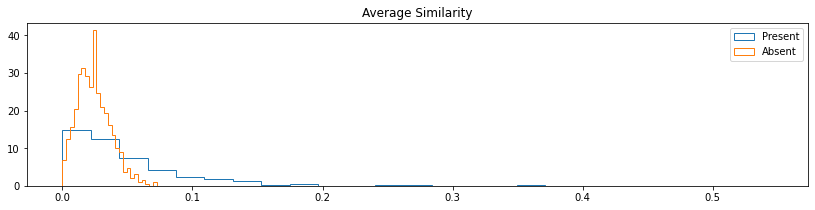

TTest stat :  Ttest_indResult(statistic=11.813956314648433, pvalue=1.2629743093795593e-29)
Present Mean   : 0.0483
Absent  Mean   : 0.0241
Present Median : 0.0343
Absent  Median : 0.0233


In [12]:
overlap_p_ques = []
overlap_a_ques = []
for exidx, example in enumerate(all_taken_answers):
    code = example["answer"]["code"]
    present_scores, absent_scores = [], []
    for api_idx, api in enumerate(apis):
        api = str(api)  
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            present_scores.append(similarity_results[api_idx, exidx])
        else:
            absent_scores.append(similarity_results[api_idx, exidx])
    overlap_p_ques.append(
        np.mean(present_scores) if len(present_scores) > 0 else 0.0
    )
    overlap_a_ques.append(
        np.mean(absent_scores) if len(absent_scores) > 0 else 0.0,
    )

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_ques, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_ques, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Average Similarity")
plt.legend()
plt.show()
from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_ques, overlap_a_ques, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_ques))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_ques))
print("Present Median : %.4lf" % np.median(overlap_p_ques))
print("Absent  Median : %.4lf" % np.median(overlap_a_ques))

## From API perspective
### Total points = len(apis)

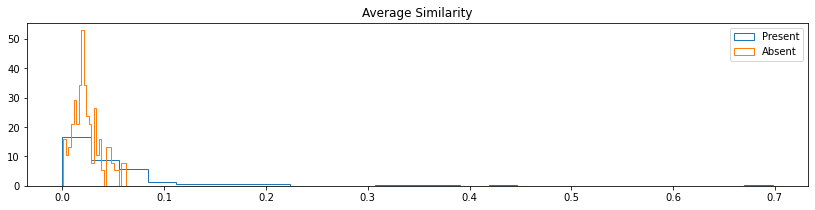

TTest stat :  Ttest_indResult(statistic=4.211063257734581, pvalue=4.2207504725576144e-05)
Present Mean   : 0.0536
Absent  Mean   : 0.0244
Present Median : 0.0305
Absent  Median : 0.0212


In [13]:
overlap_p_api = []
overlap_a_api = []
for api_idx, api in enumerate(apis):
    api = str(api)  
    present_scores, absent_scores = [], []
    for exidx, example in enumerate(all_taken_answers):
        code = example["answer"]["code"]
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            present_scores.append(similarity_results[api_idx, exidx])
        else:
            absent_scores.append(similarity_results[api_idx, exidx])
    overlap_p_api.append(
        np.mean(present_scores) if len(present_scores) > 0 else 0.0
    )
    overlap_a_api.append(
        np.mean(absent_scores) if len(absent_scores) > 0 else 0.0,
    )

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_api, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_api, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Average Similarity")
plt.legend()
plt.show()

from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_api, overlap_a_api, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_api))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_api))
print("Present Median : %.4lf" % np.median(overlap_p_api))
print("Absent  Median : %.4lf" % np.median(overlap_a_api))

## From Both Perspective
### Total points = len(examples) * len(apis)

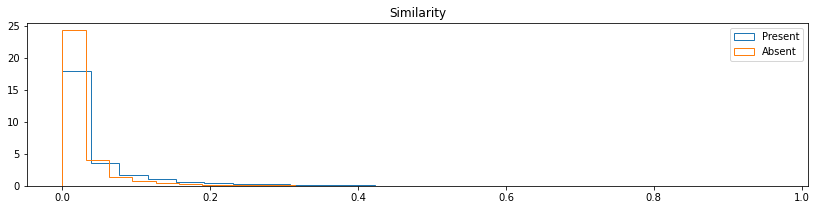

TTest stat :  Ttest_indResult(statistic=15.691332570522086, pvalue=6.836319412834522e-54)
Present Mean   : 0.0434
Absent  Mean   : 0.0241
Present Median : 0.0171
Absent  Median : 0.0000


In [14]:
overlap_p_both = []
overlap_a_both = []
for api_idx, api in enumerate(apis):
    api = str(api)  
    for exidx, example in enumerate(all_taken_answers):
        code = example["answer"]["code"]
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            overlap_p_both.append(similarity_results[api_idx, exidx])
        else:
            overlap_a_both.append(similarity_results[api_idx, exidx])

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_both, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_both, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Similarity")
plt.legend()
plt.show()


from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_both, overlap_a_both, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_both))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_both))
print("Present Median : %.4lf" % np.median(overlap_p_both))
print("Absent  Median : %.4lf" % np.median(overlap_a_both))

# Title + Desc

In [15]:
sentences = []
apis = []
for point in all_about_dataframe_apis:
    sentences.append(preprocess(point["doc"]))
    apis.append(point["api"])

for answer in all_taken_answers:
    ques = answer["question"]
    title = ques["title"]
    desc = ques["ques_desc"]
    sentences.append(preprocess(title + " " + desc))
    pass

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)
print(X.shape)

documentation_features = X[:len(all_about_dataframe_apis), :]
example_features = X[len(all_about_dataframe_apis):, :]
print(documentation_features.shape, example_features.shape)

from sklearn.metrics.pairwise import cosine_similarity
similarity_results = cosine_similarity(documentation_features, example_features)
print(similarity_results.shape)


(812, 2297)
(153, 2297) (659, 2297)
(153, 659)


## From Example perspective

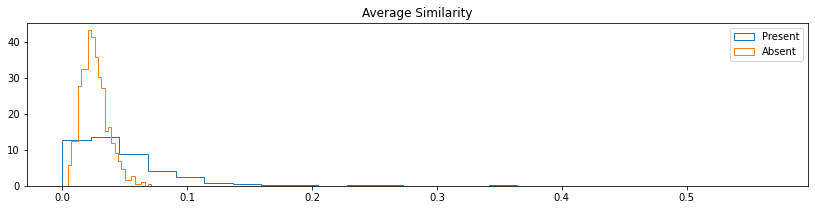

TTest stat :  Ttest_indResult(statistic=11.676851209809712, pvalue=5.388082713901777e-29)
Present Mean   : 0.0474
Absent  Mean   : 0.0256
Present Median : 0.0370
Absent  Median : 0.0245


In [16]:
overlap_p_ques = []
overlap_a_ques = []
for exidx, example in enumerate(all_taken_answers):
    code = example["answer"]["code"]
    present_scores, absent_scores = [], []
    for api_idx, api in enumerate(apis):
        api = str(api)  
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            present_scores.append(similarity_results[api_idx, exidx])
        else:
            absent_scores.append(similarity_results[api_idx, exidx])
    overlap_p_ques.append(
        np.mean(present_scores) if len(present_scores) > 0 else 0.0
    )
    overlap_a_ques.append(
        np.mean(absent_scores) if len(absent_scores) > 0 else 0.0,
    )

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_ques, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_ques, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Average Similarity")
plt.legend()
plt.show()

from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_ques, overlap_a_ques, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_ques))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_ques))
print("Present Median : %.4lf" % np.median(overlap_p_ques))
print("Absent  Median : %.4lf" % np.median(overlap_a_ques))

## From API perspective

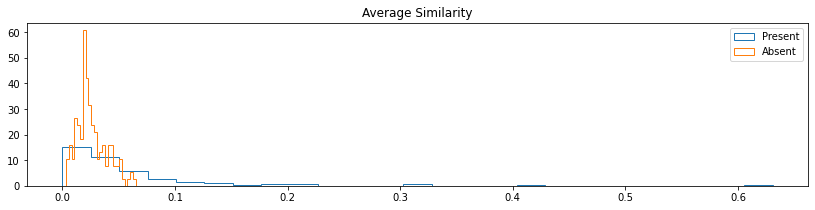

TTest stat :  Ttest_indResult(statistic=4.85611074715498, pvalue=2.807865358851604e-06)
Present Mean   : 0.0561
Absent  Mean   : 0.0259
Present Median : 0.0383
Absent  Median : 0.0228


In [17]:
overlap_p_api = []
overlap_a_api = []
for api_idx, api in enumerate(apis):
    api = str(api)  
    present_scores, absent_scores = [], []
    for exidx, example in enumerate(all_taken_answers):
        code = example["answer"]["code"]
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            present_scores.append(similarity_results[api_idx, exidx])
        else:
            absent_scores.append(similarity_results[api_idx, exidx])
    overlap_p_api.append(
        np.mean(present_scores) if len(present_scores) > 0 else 0.0
    )
    overlap_a_api.append(
        np.mean(absent_scores) if len(absent_scores) > 0 else 0.0,
    )

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_api, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_api, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Average Similarity")
plt.legend()
plt.show()

from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_api, overlap_a_api, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_api))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_api))
print("Present Median : %.4lf" % np.median(overlap_p_api))
print("Absent  Median : %.4lf" % np.median(overlap_a_api))

## Both API and Example

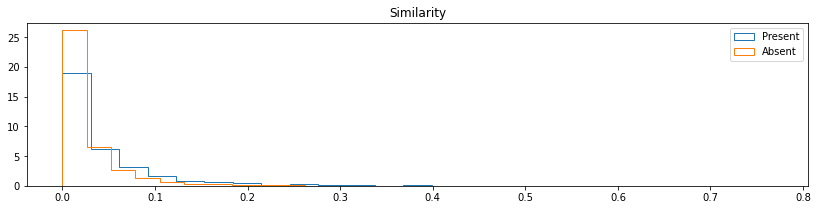

TTest stat :  Ttest_indResult(statistic=18.105177528453048, pvalue=1.7759344417025296e-70)
Present Mean   : 0.0441
Absent  Mean   : 0.0256
Present Median : 0.0228
Absent  Median : 0.0125


In [18]:
overlap_p_both = []
overlap_a_both = []
for api_idx, api in enumerate(apis):
    api = str(api)  
    for exidx, example in enumerate(all_taken_answers):
        code = example["answer"]["code"]
        found = False
        for c in code:
            if api in c:
                found = True
                break
        if found:
            overlap_p_both.append(similarity_results[api_idx, exidx])
        else:
            overlap_a_both.append(similarity_results[api_idx, exidx])

import matplotlib.pyplot as plt
plt.figure(figsize=(14,3))
plt.hist(overlap_p_both, label="Present", bins=25, histtype=u'step', density=True)
plt.hist(overlap_a_both, label="Absent", bins=25, histtype=u'step', density=True)
plt.title("Similarity")
plt.legend()
plt.show()
from scipy import stats
ttest_result = stats.ttest_ind(overlap_p_both, overlap_a_both, equal_var=False)
print("TTest stat : ", ttest_result)
import numpy as np
print("Present Mean   : %.4lf" % np.mean(overlap_p_both))
print("Absent  Mean   : %.4lf" % np.mean(overlap_a_both))
print("Present Median : %.4lf" % np.median(overlap_p_both))
print("Absent  Median : %.4lf" % np.median(overlap_a_both))

# Motivating Example

In [19]:
tile = "Pandas index column"
desc = """
I am trying to concat three files into one xlsx file. I'm able to concat but the index column is not getting removed. My Dataframe after using concat function is having index column of all three xlsx file from 0 to 3000 for three times. How should I approach to resolve the issue?
"""

processed_sent = preprocess(title + " " + desc)
print(processed_sent)

 python datafram get nan column row tri concat three file one xlsx file abl concat index column get remov datafram use concat function index column three xlsx file 3000 three time approach resolv issu


In [20]:
features = vectorizer.transform([processed_sent])
print(features.shape)

_ex_similarity_results = cosine_similarity(documentation_features, features)[:, 0].tolist()
api_with_scores = [(a, s) for a, s in zip(apis, _ex_similarity_results)]
sorted_apis = sorted(api_with_scores, key=lambda x: x[1])[::-1]
print(sorted_apis[:10])

(1, 2297)
[('set_index', 0.13626895208471285), ('index', 0.13066515876685347), ('droplevel', 0.12434958342038938), ('to_csv', 0.11796995204497678), ('transpose', 0.11510700327232007), ('rename_axis', 0.09755051156509764), ('keys', 0.09643143470711027), ('drop_duplicates', 0.09307883339078662), ('filter', 0.09050256602310935), ('iterrows', 0.088593566525098)]
